# Lab 3: Unsupervised Learning (Advanced Clustering)

For this lab we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

More details about the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

Your task is to perform clustering on the given dataset. 

**Submission: submit via onq.** 


In [1]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Task 1: Read the dataset and report the basic statistics of the dataset
import data from sklearn.datasets and selecte pre-defined categories:

from sklearn.datasets import fetch_20newsgroups

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))


In [3]:
# TODO code for task 1

In [4]:
categories =['comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism']
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
data=dataset.data
pprint(list(dataset.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey']


In [5]:
label=dataset.target

In [6]:
dataset = pd.DataFrame(data)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2852 non-null   object
dtypes: object(1)
memory usage: 22.4+ KB


In [8]:
dataset.describe()

,0
count,2852
unique,2770
top,
freq,61


In [9]:
dataset.dtypes

0    object
dtype: object

Task 2: Data cleaning.
Use standard text preprocessing steps to preprocess raw textual content. 
A sample preprocessing function is provided as below.

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [10]:
# TODO code for task 2
def preprocess_text(text: str, remove_stopwords: bool):
    # remove links
    text = re.sub(r"http\S+", "", str(text))
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # remove stopwords
    if remove_stopwords:
      tokens = nltk.word_tokenize(text)
      tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
      text = " ".join(tokens)
# return text in lower case and stripped of whitespaces
      text = text.lower().strip()
    return text

In [11]:
data

['I just moved from Borland C++ 3.0 to Visual C++ today. When I tried\nto compile my C++ program, it complained a function prototype problem.\nIt turned out that the typedef WORD in MS C++ is a BYTE, not unsigned int.\n\n    Could anyone shine some light on this subject ? Why a WORD is a BYTE ?\n\n\n-Ming T. Lin\n\n',
 "\n: \tNice cop out bill.\n\nI'm sure you're right, but I have no idea to what you refer. Would you\nmind explaining how I copped out?",
 "I'm attempting to transfer files from my home computer running\nWindows 3.1 Terminal to a workstation at school.  The file transfer protocol\nat home is Kermit for binary files.  I'm running Kermit on the workstation at school and\nsetting the file transfer protocol to binary.  I am unable to upload files\nto school but can download files from school to home.  During download,\nTerminal displays ther retrying message several times then the message '\nVerify you're using the correct protocol'.  \n\tAnyone have any ideas on how to fix? 

In [12]:
clean=[]
for i in data:
  clean.append(preprocess_text(i,True))

In [13]:
clean

['moved borland c visual c today tried compile c program complained function prototype problem turned typedef word ms c byte unsigned int could anyone shine light subject word byte ming lin',
 'nice cop bill sure right idea refer would mind explaining copped',
 'attempting transfer files home computer running windows terminal workstation school file transfer protocol home kermit binary files running kermit workstation school setting file transfer protocol binary unable upload files school download files school home download terminal displays ther retrying message several times message verify using correct protocol anyone ideas fix either e mail post group thanks advance',
 'murdering would moral significance since would nothing voluntary starting get point mimicry necessarily action imitated parrot saying pretty polly necessarily commenting pulchritude polly see posters given many examples exactly seem short memory saying must possibility organism people talking consider alternatives r

In [14]:
len(clean)

2852

Task 3: create vector representation of each document using TF-IDF encoding, if we don't know what is TF-IDF encoding, read this: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html 

In [15]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn

In [16]:
tfidf_vectorizer = TfidfVectorizer(input=clean, stop_words='english')

In [17]:
tfidf_vector = tfidf_vectorizer.fit_transform(clean)

In [18]:
tfidf_vector

<2852x34061 sparse matrix of type '<class 'numpy.float64'>'
	with 155334 stored elements in Compressed Sparse Row format>

Task 4: Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means 

We will select k depending on graph.

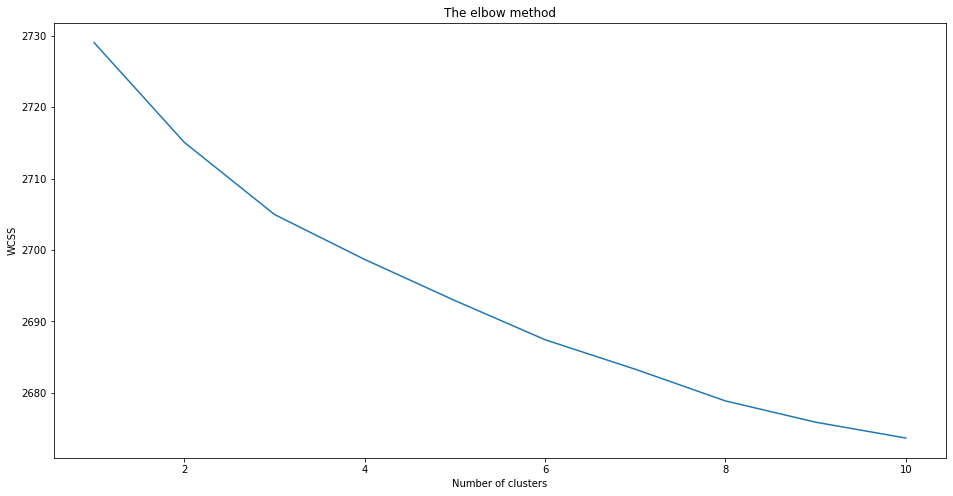

In [19]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(tfidf_vector)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 8, init = 'random',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(tfidf_vector)

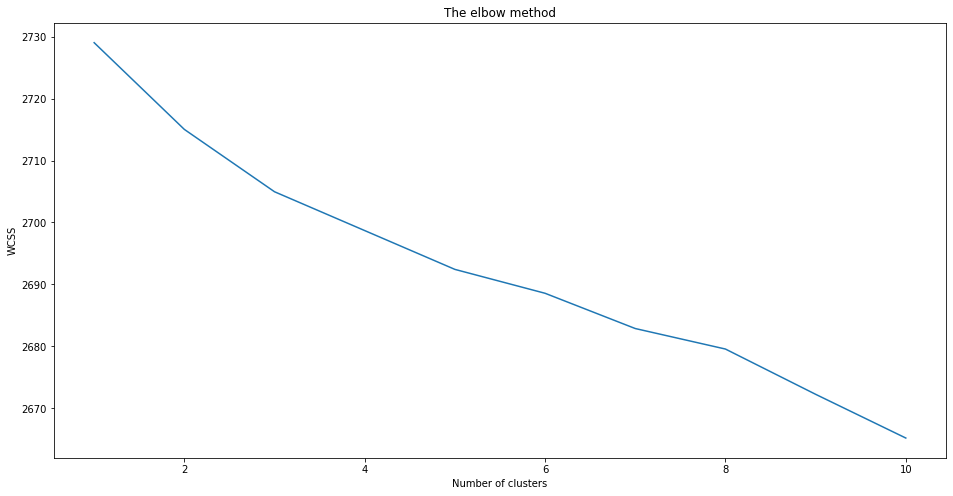

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(tfidf_vector)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [22]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_ = KMeans(n_clusters = 8, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_ = kmeans_.fit_predict(tfidf_vector)

Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods. 

In [23]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=12)
tsvd.fit(tfidf_vector)
tsvd_mat = tsvd.transform(tfidf_vector)

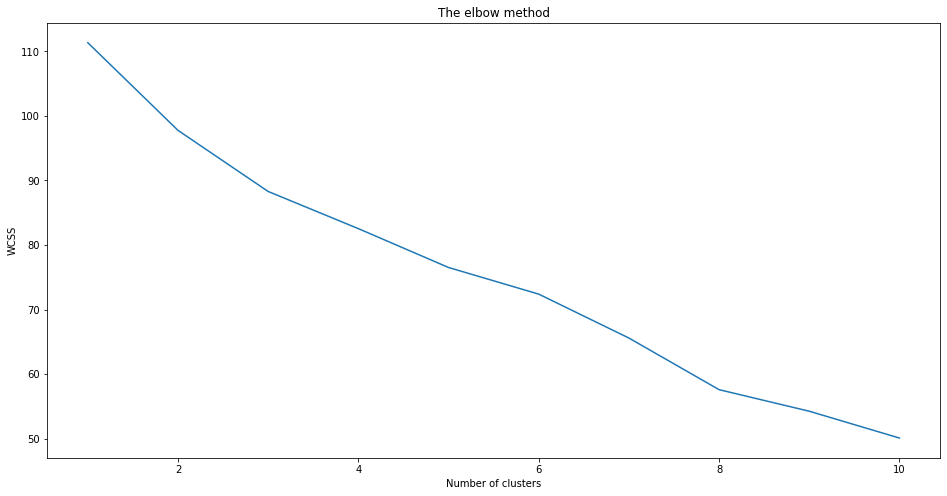

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(tsvd_mat)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmean_1 = KMeans(n_clusters = 8, init = 'random',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmean_1 = kmean_1.fit_predict(tsvd_mat)

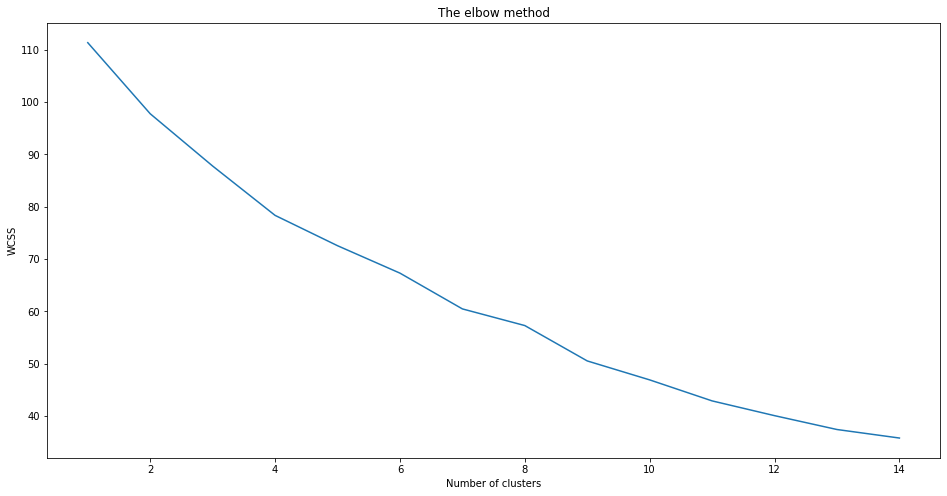

In [26]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(tsvd_mat)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(16,8))
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [27]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmean_2 = KMeans(n_clusters = 12, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmean_2 = kmean_2.fit_predict(tsvd_mat)

Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html 

In [28]:
# TODO for Task 6
sklearn.metrics.mutual_info_score(label, y_kmeans, contingency=None)

0.5665231258889163

In [29]:
sklearn.metrics.mutual_info_score(label, y_kmeans_, contingency=None)

0.6778477089072252

In [30]:
sklearn.metrics.mutual_info_score(label, y_kmean_1, contingency=None)

0.5921511658870307

In [31]:
sklearn.metrics.mutual_info_score(label, y_kmean_2, contingency=None)

0.6612177881185519